<a href="https://colab.research.google.com/github/ninivehelen/Analise_De_Dados/blob/master/Limpeza_Visualizacao_dadosVacina_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Limpeza dos dados sobre a vacinação no Distrito Federal(DF)**
**dados extraídos do https://dados.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


****Importando bibliotecas**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df_vacina = pd.read_csv("/content/drive/MyDrive/df_vacina.csv", sep=";")

**Visualizando os dados**

In [5]:
df_vacina.head(4)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem,vacina_numdose
0,e101d1ea-936c-406f-9c9f-b004432f93cd-i0b0,c5d589c269fdab3e869ac7b00c764f066be88d78de31b9...,27.0,1994-08-18,M,99.0,SEM INFORMACAO,330490.0,10.0,SAO GONCALO,BRASIL,RJ,24445.0,B,11150,UNIDADE BASICA DE SAUDE N 1 ASA SUL,UBS 01 ASA SUL,530010,BRASILIA,DF,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,217VCD224Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-08-20,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,2021-08-20T17:11:42.000Z,16341,2
1,69b3de2d-6bea-47d8-a9f8-6c03d5c72536-i0b0,4d45d5ae1c1ac43788fee2514dc911f02264a044b0ac13...,14.0,2007-01-21,M,1.0,BRANCA,500270.0,10.0,CAMPO GRANDE,BRASIL,MS,79040.0,B,3212033,UNIDADE BASICA DE SAUDE N 4 SAO SEBASTIAO,UBS 4 MORRO AZUL SAO SEBASTIAO,530010,BRASILIA,DF,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FG3528,PFIZER,Organization/00394544000851,2021-10-13,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,2021-10-13T17:11:59.000Z,16341,2
2,a94ae13a-2ddd-469f-895b-ad5fca115c76-i0b0,9bc8b46ecef729448f4d88a7c8d986579c8bb69d266734...,39.0,1981-12-06,F,3.0,PARDA,530010.0,10.0,BRASILIA,BRASIL,DF,71571.0,B,10634,UNIDADE BASICA DE SAUDE 01 PARANOA,UBS 1 PARANOA,530010,BRASILIA,DF,103,Diabetes Mellitus,1.0,Comorbidades,210121,ASTRAZENECA,Organization/00394544000851,2021-08-17,2ª Dose,89,COVID-19 ASTRAZENECA - ChAdOx1-S,Novo PNI,2021-08-17T13:32:41.000Z,16341,2
3,6b869ee2-b100-4f4e-9a09-0f87ba9c6c2a-i0b0,fd5549d1162c6068db341458c7cddb0467e932cdaff3fd...,26.0,1995-03-07,M,2.0,PRETA,520490.0,10.0,CAMPOS BELOS,BRASIL,GO,73840.0,B,2779374,UNIDADE BASICA DE SAUDE N 1 DA ESTRUTURAL,UBS 01 ESTRUTURAL,530010,BRASILIA,DF,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,210388,SINOVAC/BUTANTAN,Organization/61189445000156,2021-10-08,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI,2021-10-08T19:09:46.000Z,16341,2


**Descrição dos dados**

In [6]:
df_vacina.describe()

,paciente_idade,paciente_racacor_codigo,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_cep,estabelecimento_valor,estabelecimento_municipio_codigo,vacina_grupoatendimento_codigo,vacina_categoria_codigo,vacina_codigo,id_sistema_origem,vacina_numdose
count,4.133261e+06,4.133261e+06,4.098478e+06,4.098589e+06,3.454101e+06,4.133262e+06,4133262.0,4.133262e+06,4.131754e+06,4.133262e+06,4.133262e+06,4.133262e+06
mean,4.313339e+01,4.226944e+01,5.068851e+05,1.000116e+01,6.978292e+04,2.178688e+06,530010.0,3.356056e+03,3.429441e+00,8.619961e+01,1.634287e+04,2.929772e+00
std,1.788981e+01,4.747313e+01,7.571144e+04,4.799356e-01,9.998875e+03,3.449518e+06,0.0,5.518447e+04,7.505594e+00,1.003460e+00,6.504907e+01,7.070552e+00
min,0.000000e+00,1.000000e+00,1.100010e+05,1.000000e+01,0.000000e+00,1.045600e+04,530010.0,0.000000e+00,1.000000e+00,8.500000e+01,1.634100e+04,1.000000e+00
25%,2.900000e+01,3.000000e+00,5.300100e+05,1.000000e+01,7.109000e+04,1.089800e+04,530010.0,2.010000e+02,2.000000e+00,8.500000e+01,1.634100e+04,1.000000e+00
50%,4.200000e+01,4.000000e+00,5.300100e+05,1.000000e+01,7.213000e+04,1.115000e+04,530010.0,2.010000e+02,2.000000e+00,8.600000e+01,1.634100e+04,1.000000e+00
75%,5.600000e+01,9.900000e+01,5.300100e+05,1.000000e+01,7.246500e+04,3.742873e+06,530010.0,2.040000e+02,2.000000e+00,8.700000e+01,1.634100e+04,2.000000e+00
max,1.210000e+02,9.900000e+01,9.999990e+05,3.560000e+02,9.999900e+04,9.768637e+06,530010.0,9.999990e+05,1.140000e+02,8.900000e+01,1.860200e+04,3.800000e+01


**Verificando o tipo dos dados**

In [7]:
df_vacina.dtypes

document_id                                  object
paciente_id                                  object
paciente_idade                              float64
paciente_datanascimento                      object
paciente_enumsexobiologico                   object
paciente_racacor_codigo                     float64
paciente_racacor_valor                       object
paciente_endereco_coibgemunicipio           float64
paciente_endereco_copais                    float64
paciente_endereco_nmmunicipio                object
paciente_endereco_nmpais                     object
paciente_endereco_uf                         object
paciente_endereco_cep                       float64
paciente_nacionalidade_enumnacionalidade     object
estabelecimento_valor                         int64
estabelecimento_razaosocial                  object
estalecimento_nofantasia                     object
estabelecimento_municipio_codigo              int64
estabelecimento_municipio_nome               object
estabelecime

**Verificando dados nulos**

In [8]:
df_vacina.isnull().sum()

document_id                                      0
paciente_id                                      1
paciente_idade                                   1
paciente_datanascimento                          1
paciente_enumsexobiologico                       1
paciente_racacor_codigo                          1
paciente_racacor_valor                           1
paciente_endereco_coibgemunicipio            34784
paciente_endereco_copais                     34673
paciente_endereco_nmmunicipio                34743
paciente_endereco_nmpais                     34673
paciente_endereco_uf                         34784
paciente_endereco_cep                       679161
paciente_nacionalidade_enumnacionalidade      2403
estabelecimento_valor                            0
estabelecimento_razaosocial                      0
estalecimento_nofantasia                         0
estabelecimento_municipio_codigo                 0
estabelecimento_municipio_nome                   0
estabelecimento_uf             

**Apagando alguns dados nulos**

In [9]:
df_vacina = df_vacina.dropna(subset = ["paciente_id"])

**Verificando novamente dados nulos**

In [10]:
df_vacina.isnull().sum()

document_id                                      0
paciente_id                                      0
paciente_idade                                   0
paciente_datanascimento                          0
paciente_enumsexobiologico                       0
paciente_racacor_codigo                          0
paciente_racacor_valor                           0
paciente_endereco_coibgemunicipio            34783
paciente_endereco_copais                     34672
paciente_endereco_nmmunicipio                34742
paciente_endereco_nmpais                     34672
paciente_endereco_uf                         34783
paciente_endereco_cep                       679160
paciente_nacionalidade_enumnacionalidade      2402
estabelecimento_valor                            0
estabelecimento_razaosocial                      0
estalecimento_nofantasia                         0
estabelecimento_municipio_codigo                 0
estabelecimento_municipio_nome                   0
estabelecimento_uf             

**Colocando informaçao de "nao informado" em dados faltantes que não são numericos**

In [11]:
df_vacina.fillna("Não informado", inplace = True)

In [12]:
df_vacina.isnull().sum()

document_id                                 0
paciente_id                                 0
paciente_idade                              0
paciente_datanascimento                     0
paciente_enumsexobiologico                  0
paciente_racacor_codigo                     0
paciente_racacor_valor                      0
paciente_endereco_coibgemunicipio           0
paciente_endereco_copais                    0
paciente_endereco_nmmunicipio               0
paciente_endereco_nmpais                    0
paciente_endereco_uf                        0
paciente_endereco_cep                       0
paciente_nacionalidade_enumnacionalidade    0
estabelecimento_valor                       0
estabelecimento_razaosocial                 0
estalecimento_nofantasia                    0
estabelecimento_municipio_codigo            0
estabelecimento_municipio_nome              0
estabelecimento_uf                          0
vacina_grupoatendimento_codigo              0
vacina_grupoatendimento_nome      

**Verificando se há dados duplicados**

In [13]:
df_vacina.duplicated().sum()

0

## **Analisando os dados**

**Qual idade mais se vacinou**

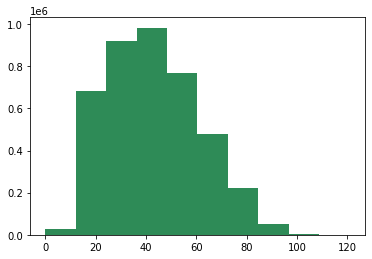

In [14]:
plt.hist(x = df_vacina['paciente_idade'], color='seagreen');


**Qual raça/Cor mais se vacinou**

In [135]:
df_vacina.paciente_racacor_valor.value_counts()

SEM INFORMACAO    1701993
PARDA             1138380
BRANCA             703499
AMARELA            455381
PRETA              132296
INDIGENA             1712
Name: paciente_racacor_valor, dtype: int64

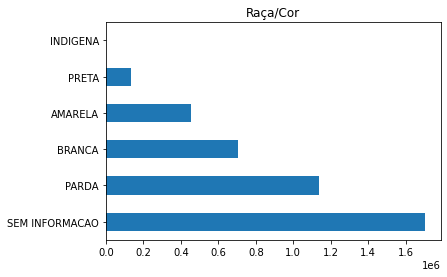

In [136]:
df_vacina.paciente_racacor_valor.value_counts().plot(kind='barh', title="Raça/Cor");

**Qual fabricante mais se vacinou**

In [134]:
df_vacina.vacina_fabricante_nome.value_counts()

PFIZER                 1670060
ASTRAZENECA/FIOCRUZ    1326628
SINOVAC/BUTANTAN        956893
ASTRAZENECA             122238
JANSSEN                  57442
Name: vacina_fabricante_nome, dtype: int64

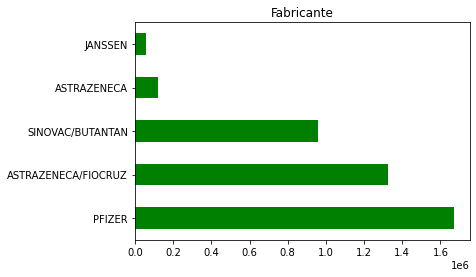

In [64]:
df_vacina.vacina_fabricante_nome.value_counts().plot(kind='barh',color="green", title="Fabricante");

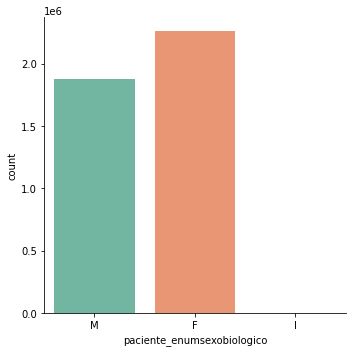

In [138]:
sns.catplot(x="paciente_enumsexobiologico", kind="count", palette="Set2", data=df_vacina);

In [123]:
colunas = ['vacina_dataaplicacao',"vacina_numdose"]

In [119]:
df_data_dose = df_vacina.filter(items = colunas)

In [147]:
df_data_dose.head()

,vacina_dataaplicacao,vacina_numdose
0,2021-08-20,2
1,2021-10-13,2
2,2021-08-17,2
3,2021-10-08,2
4,2021-10-25,2


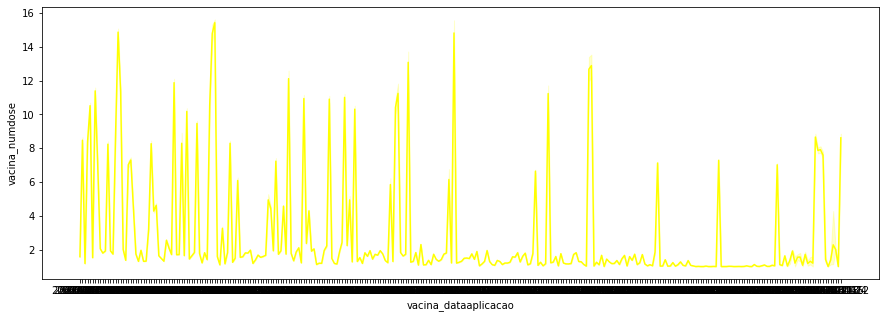

In [118]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_data_dose, x="vacina_dataaplicacao", y="vacina_numdose", color="yellow")